In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
from cryptory import Cryptory

In [2]:
def get_market_data(coin):
    # get market info from the start of 2016 to the current day
    current_time = time.strftime("%Y%m%d")
    # API url definition
    url = "https://coinmarketcap.com/currencies/{}/historical-data/?start=20130428&end={}".format(coin, current_time)
    market_info = pd.read_html(url)[0]
    return market_info
    
def processed_market_data(coin):
    market_info = get_market_data(coin)
    # convert the date string to the correct date format
    market_info = market_info.assign(Date=pd.to_datetime(market_info['Date']))
    # when Volume is equal to '-' convert it to 0
    try:
        market_info.loc[market_info['Volume']=="-",'Volume']=0
    except:
        pass
    # convert to int
    market_info['Volume'] = market_info['Volume'].astype('int64')
    return market_info

In [ ]:
# for ethereum market data, processed_market_data('ethereum')
bitcoin_market_info = processed_market_data('bitcoin')

#### get merged data of multiple coins from bitinfo

In [ ]:
crypto_data = Cryptory(from_date = "2013-01-01")

In [8]:
all_coins_df = crypto_data.extract_bitinfocharts("btc")

# coins of interest
bitinfocoins = ["btc", "eth", "xrp", "bch", "ltc", "dash", "xmr", "doge"]
for coin in bitinfocoins[1:]:
    all_coins_df = all_coins_df.merge(crypto_data.extract_bitinfocharts(coin), on="date", how="left")

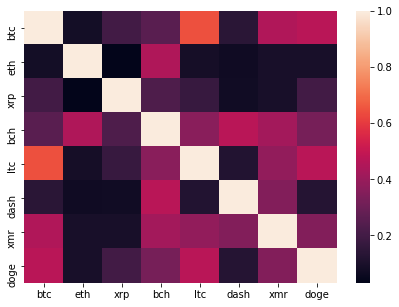

In [9]:
# date column not need for upcoming calculations
all_coins_df = all_coins_df.drop('date', axis=1)
corr = all_coins_df.pct_change().corr(method='pearson')
fig, ax = plt.subplots(figsize=(7,5))  
sns.heatmap(corr, 
            xticklabels=[col.replace("_price", "") for col in corr.columns.values],
            yticklabels=[col.replace("_price", "") for col in corr.columns.values],
            annot_kws={"size": 16})
plt.show()

#### chart overlay of bitcoin price and google searches for bitcoin

In [11]:
btc_google_trends_data = crypto_data.get_google_trends(kw_list=['bitcoin'])
btc_coinmarketcap_data = crypto_data.extract_coinmarketcap('bitcoin')

In [15]:
btc_google = btc_google_trends_data.merge(btc_coinmarketcap_data[['date','close**']], on='date', how='inner')

In [16]:
btc_google

,date,bitcoin,close**
0,2018-06-01,6.000000,7541.45
1,2018-05-31,7.000000,7494.17
2,2018-05-30,7.000000,7406.52
3,2018-05-29,7.000000,7472.59
4,2018-05-28,7.000000,7135.99
5,2018-05-27,6.000000,7368.22
6,2018-05-26,6.000000,7355.88
7,2018-05-25,7.000000,7480.14
8,2018-05-24,8.000000,7587.34
9,2018-05-23,8.000000,7557.82


In [17]:
# need to scale columns (min-max scaling)
btc_google[['bitcoin','close**']] = (
        btc_google[['bitcoin', 'close**']]-btc_google[['bitcoin', 'close**']].min())/(
        btc_google[['bitcoin', 'close**']].max()-btc_google[['bitcoin', 'close**']].min())

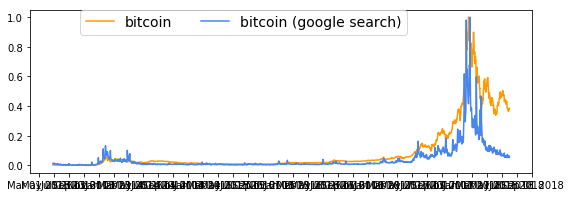

In [19]:
fig, ax1 = plt.subplots(1, 1, figsize=(9, 3))
ax1.set_xticks([datetime.date(j,i,1) for i in range(1,13,2) for j in range(2013,2019)])
ax1.set_xticklabels([datetime.date(j,i,1).strftime('%b %d %Y') 
                     for i in range(1,13,2) for j in range(2013,2019)])
ax1.plot(btc_google['date'].astype(datetime.datetime),
             btc_google['close**'], label='bitcoin', color='#FF9900')
ax1.plot(btc_google['date'].astype(datetime.datetime),
             btc_google['bitcoin'], label="bitcoin (google search)", color='#4885ed')
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., ncol=2, prop={'size': 14})
plt.show()